In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, f_regression, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve,precision_score, roc_auc_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('application_data_cleanest.csv', index_col=0)

In [3]:
columns = df.columns

In [4]:
X = df[columns[:-1]]
y = df[columns[-1]]

In [5]:
fs=SelectKBest(f_regression, k = 25)

In [6]:
fs.fit(X,y.values.ravel())

SelectKBest(k=25, score_func=<function f_regression at 0x0000013B7D1B0B80>)

In [7]:
features = X.columns[fs.get_support()]
features

Index(['CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'ORGANIZATION_TYPE_NA', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [8]:
X=X[features]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
logreg = LogisticRegression(max_iter=500)
rc = RidgeClassifier(random_state=1223)
ada = AdaBoostClassifier(random_state=1223)
xgb = XGBClassifier(random_state= 1223, n_jobs = 8)

Wall time: 7min 34s


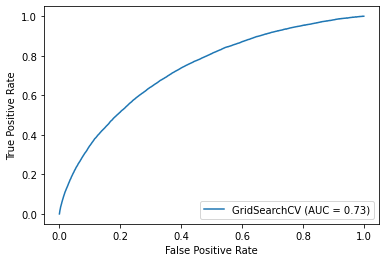

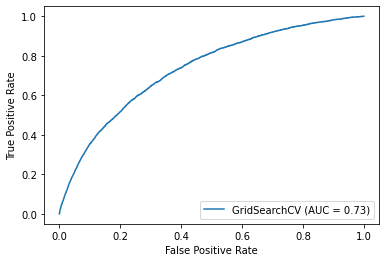

In [11]:
%%time
#Logistic Regression
params = {
    'solver':['lbfgs', 'liblinear'],
    'penalty':['l1', 'l2'],
    'C':[.5, 1]
}
lrclf = GridSearchCV(logreg, params, scoring='roc_auc', cv = 5, n_jobs=8)
lrclf.fit(X_train, y_train.values.ravel())
plot_roc_curve(lrclf, X_train, y_train)
plot_roc_curve(lrclf, X_test, y_test)

In [12]:
lrclf.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

In [13]:
lrclf.score(X_train, y_train)

0.7328020997865284

In [14]:
lrclf.score(X_test, y_test)

0.7348831659722113

Wall time: 5.18 s


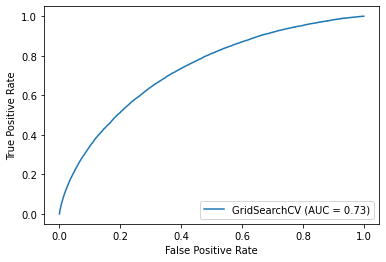

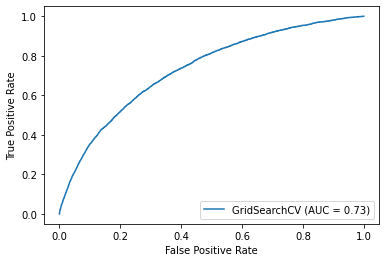

In [15]:
%%time
#Ridge Classification
params = {
    'alpha':[0,.2,.4,.6,.8,1],
    'solver':['cholesky', 'lsqr']
}
rcclf = GridSearchCV(rc, params, scoring='roc_auc', cv = 5, n_jobs=8)
rcclf.fit(X_train, y_train.values.ravel())
plot_roc_curve(rcclf, X_train, y_train)
plot_roc_curve(rcclf, X_test, y_test)

In [16]:
rcclf.score(X_train, y_train)

0.7320950306798734

In [17]:
rcclf.score(X_test, y_test)

0.7335198077971088

Wall time: 1min 30s


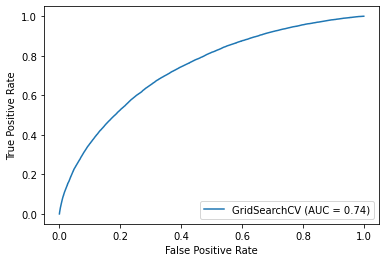

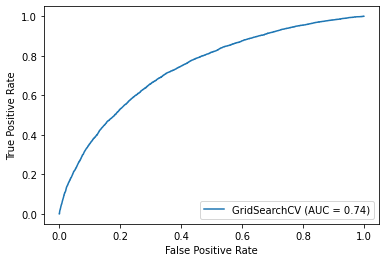

In [18]:
%%time
#ADA Boost
params = {
    'n_estimators':[5,10,20,50],
    'learning_rate':[0, 0.5, 1],
    'algorithm':['SAMME', 'SAMME.R']
}
adaclf = GridSearchCV(ada, params, scoring='roc_auc', cv = 5, n_jobs=8)
adaclf.fit(X_train, y_train.values.ravel())
plot_roc_curve(adaclf, X_train, y_train)
plot_roc_curve(adaclf, X_test, y_test)

In [19]:
adaclf.score(X_test,y_test)

0.7394874536243914

In [20]:
adaclf.score(X_train,y_train)

0.7387724473082712

Wall time: 14min 21s


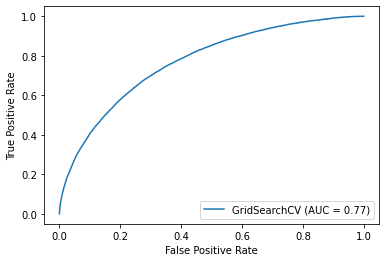

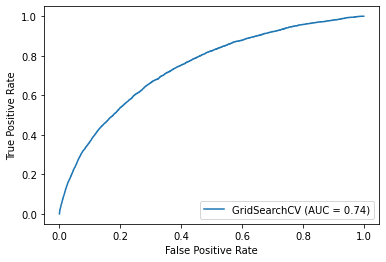

In [21]:
%%time
#XGB
params = {
    'eta':[.1,.3,.7,1],
    'gamma':[0,5,10],
    'scale_pos_weight':[0,.3,.7,1]
}
xgbclf = GridSearchCV(xgb, params, scoring='roc_auc', cv = 5, n_jobs=8)
xgbclf.fit(X_train, y_train.values.ravel())
plot_roc_curve(xgbclf, X_train, y_train)
plot_roc_curve(xgbclf, X_test, y_test)

In [22]:
xgbclf.score(X_train, y_train)

0.7701164252904809

In [23]:
xgbclf.score(X_test, y_test)

0.7439057679774613

In [24]:
xgbclf.best_params_

{'eta': 0.1, 'gamma': 5, 'scale_pos_weight': 0.7}

In [28]:
xgb1 = XGBClassifier(random_state= 1223, n_jobs = 8, eta = 0.1, gamma = 5, scale_pos_weight = 0.7)

In [30]:
params={}
xgbclf1 = GridSearchCV(xgb1, params, scoring='roc_auc', cv = 5, n_jobs=8)
xgbclf1.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eta=0.1, gamma=5,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=None, random_state=1223,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=0.7, subsample=None,
                                     tree_method=Non

In [31]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgbclf1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [32]:
roc_auc

0.7439057679774613

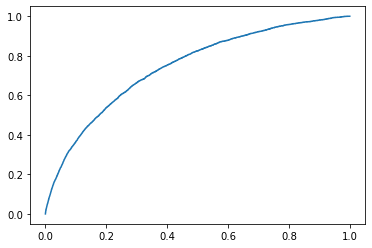

In [33]:
plt.plot(fpr,tpr)

In [34]:
df_roc=pd.DataFrame()
df_roc['fpr']=fpr
df_roc['tpr']=tpr
df_roc.to_csv('roc.csv')